In [106]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import GillespieSim as gs

In [107]:
def permease_solution(mrna, permease, tau):
    gamma = 0.0231
    alpha = 1000
    k_p = 0.00231
    yss = ((alpha * k_p * mrna)/gamma)
    return  yss + (permease - yss) * np.exp(-gamma*tau)

lacI_model = gs.ReactionModel(

        species = {
                    'mRNA': 0,
                    'Beta': 0,              
                    'Intracellular_tmg': 0,
                    'LacI_Tetramers': 0,   
                    'Active_LacI': 0,      
                    'Permease': 1000,        
                    'LacI_monomer': 0,
                    'TMG': 40},  
        
        propensities = {
                        'kc_mRNA': 2 ,
                        'kd_mRNA': np.log(2)/2.5},

        reactions = {
                    'Transcription': ['kc_mRNA'],
                    'mRNA_Degradation': ['kd_mRNA', 'mRNA']},
        
        q = {
            'Transcription':       {'create': ['mRNA'],       'destroy': [None]},
            'mRNA_Degradation':    {'create': [None],         'destroy': ['mRNA']}},
        
        math_model= {
                    'Beta':              lambda tmg:                         0.00123 * pow(tmg, 0.6),
                    'Intracellular_tmg': lambda beta, permease:              beta * permease,
                    'LacI_Tetramers':    lambda monomer:                     monomer + (monomer/100),
                    'Active_LacI':       lambda intracellular_tmg, tetramer: 1/(1 + (intracellular_tmg / 0.12)**2) * tetramer,
                    'Permease':          permease_solution,
                    'LacI_monomer':      lambda monomer, tau:                (15.4 - 0.0231 * monomer)*tau},

        interaction_map = {       
                            'Beta':                 ['TMG'],
                            'Intracellular_tmg':    ['Beta', 'Permease'],
                            'LacI_Tetramers':       ['LacI_monomer'],
                            'Active_LacI':          ['Intracellular_tmg', 'LacI_Tetramers'],
                            'Permease':             ['mRNA', 'Permease', 'Tau'],
                            'LacI_monomer':         ['LacI_monomer', 'Tau']}
                            )


In [108]:
lacI_model.show_eqs

<bound method ReactionModel.show_eqs of <GillespieSim.ReactionModel object at 0x7f7f8b589160>>

In [109]:
LacI_sim = gs.Gillespie(tmax=600, sampling_time = 0.1,reaction_model = lacI_model, model_name='lacI_model', cells=1)
LacI_sim.simulate_gillespie()

100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


In [110]:
df = pd.read_csv('lacI_model.csv', delimiter='|')
df.head()

,mRNA,Beta,Intracellular_tmg,LacI_Tetramers,Active_LacI,Permease,LacI_monomer,TMG,time,cell
0,0,0.0112,0.0000,0.0000,0.0000,982.8976,11.5002,40,0.0,1
1,0,0.0112,11.0085,11.6152,0.0000,955.5978,18.4546,40,0.1,1
2,0,0.0112,10.7027,18.6391,0.0014,949.7654,3.9684,40,0.2,1
3,0,0.0112,10.6374,4.0081,0.0023,926.1872,16.6593,40,0.3,1
4,0,0.0112,10.3733,16.8259,0.0005,921.6571,3.1871,40,0.4,1


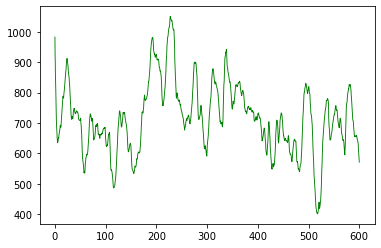

In [111]:
plt.plot(df.time, df.Permease, 'g', lw=0.9)

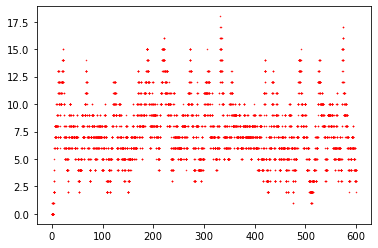

In [112]:
plt.plot(df.time, df.mRNA, 'ro', ms=0.5)